In [28]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def clean_tweet(tweet, exclude_words):
    # Remove product names
    for word in exclude_words:
        tweet = re.sub(r'\b' + word + r'\b', '', tweet, flags=re.IGNORECASE)
    # Remove URLs, mentions, special characters, and numbers
    tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word.lower() not in stop_words)
    return tweet
# Load dataset
data = pd.read_csv("mobile_phone_tweets_balanced.csv")  # Replace with your training data path

# List of product names to exclude
exclude_words = ['iphone', 'samsung', 'galaxy', 'google', 'pixel', 'oneplus', 'xiaomi']

# Clean the tweet content
data['cleaned_content'] = data['content'].apply(lambda x: clean_tweet(x, exclude_words))


<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\USER\AppData\Local\Temp\ipykernel_14660\2027031008.py:6: SyntaxWarning: invalid escape sequence '\w'
  tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)


In [38]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_content'])
y = data['sentiment']  # Assuming the training data has a 'sentiment' column with labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train and evaluate multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"\n{model_name} Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")



Random Forest Accuracy: 0.9050, Precision: 0.9307, Recall: 0.9100, F1-Score: 0.9092

Logistic Regression Accuracy: 0.9050, Precision: 0.9307, Recall: 0.9100, F1-Score: 0.9092

SVM Accuracy: 0.9050, Precision: 0.9307, Recall: 0.9100, F1-Score: 0.9092

Naive Bayes Accuracy: 0.9000, Precision: 0.9262, Recall: 0.9078, F1-Score: 0.9050


In [40]:
# Select the best model (for demonstration, using Random Forest)
selected_model = models["Naive Bayes"]

In [41]:
def get_tweet_sentiment(tweet, vectorizer, model, exclude_words):
    """
    Function to predict the sentiment of a tweet using the trained model.
    """
    cleaned_tweet = clean_tweet(tweet, exclude_words)
    tweet_vector = vectorizer.transform([cleaned_tweet])
    sentiment = model.predict(tweet_vector)[0]
    return sentiment


In [42]:
def get_tweets_from_csv(file_path, exclude_words):
    """
    Function to read tweets from a CSV file and predict their sentiments.
    """
    try:
        data = pd.read_csv(file_path)
        tweets = data.to_dict(orient='records')
        for tweet in tweets:
            tweet['sentiment'] = get_tweet_sentiment(tweet['content'], vectorizer, selected_model, exclude_words)
        return tweets
    except Exception as e:
        print(f"Error reading CSV: {str(e)}")
        return []

In [43]:
# Path to the new CSV file containing tweets to analyze
new_csv_path = "output.csv"  # Replace with the path to your new CSV file
predicted_tweets = get_tweets_from_csv(new_csv_path, exclude_words)


In [44]:
# Display the results
for tweet in predicted_tweets:
    print(f"Tweet: {tweet['content']}\nSentiment: {tweet['sentiment']}\n")

Tweet: Just got my new OnePlus! Loving it so far.
Sentiment: positive

Tweet: The display on the Xiaomi is so vibrant and clear.
Sentiment: positive

Tweet: Experiencing connectivity issues with the Xiaomi.
Sentiment: neutral

Tweet: Experiencing connectivity issues with the Samsung Galaxy.
Sentiment: neutral

Tweet: I regret buying the Google Pixel. Not worth the money.
Sentiment: negative

Tweet: Battery life on the Google Pixel could be better.
Sentiment: neutral

Tweet: Not too impressed with the OnePlus. Expected more.
Sentiment: neutral

Tweet: Having some issues with my Xiaomi. Anyone else?
Sentiment: neutral

Tweet: Really happy with the performance of my new OnePlus.
Sentiment: positive

Tweet: The Samsung Galaxy has exceeded my expectations!
Sentiment: positive

Tweet: I'm impressed with the build quality of the Google Pixel.
Sentiment: positive

Tweet: The iPhone keeps crashing. Frustrated!
Sentiment: negative

Tweet: The camera quality on the iPhone is amazing.
Sentiment: p

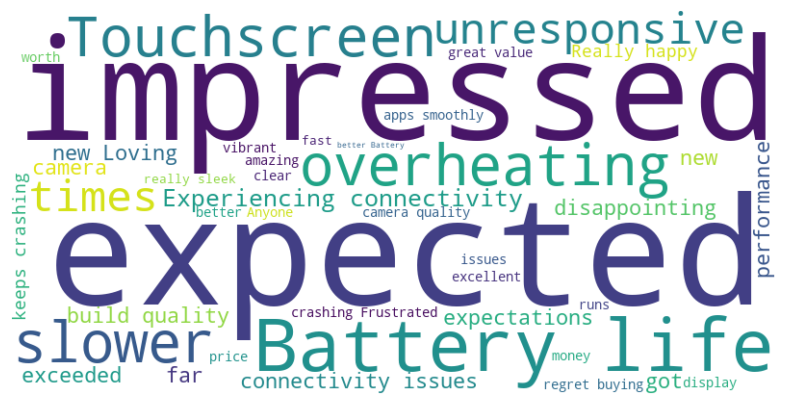

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of product names to exclude
exclude_words = ['iphone', 'samsung', 'galaxy', 'google', 'pixel', 'oneplus', 'xiaomi']

# Function to remove product names from tweets
def remove_product_names(tweet, exclude_words):
    for word in exclude_words:
        tweet = re.sub(r'\b' + word + r'\b', '', tweet, flags=re.IGNORECASE)
    return tweet

# Cleaned and processed tweets excluding product names
all_tweets = " ".join(remove_product_names(tweet['content'], exclude_words) for tweet in predicted_tweets)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(all_tweets)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to remove product names from tweets
def remove_product_names(tweet, exclude_words):
    for word in exclude_words:
        tweet = re.sub(r'\b' + word + r'\b', '', tweet, flags=re.IGNORECASE)
    return tweet

# List of product names to exclude
exclude_words = ['iphone', 'samsung', 'galaxy', 'google', 'pixel', 'oneplus', 'xiaomi']

# Filter tweets by sentiment
positive_tweets = data[data['predicted_sentiment'] == 'positive']['content']
neutral_tweets = data[data['predicted_sentiment'] == 'neutral']['content']
negative_tweets = data[data['predicted_sentiment'] == 'negative']['content']

# Clean and concatenate tweets for each sentiment
positive_text = " ".join(remove_product_names(tweet, exclude_words) for tweet in positive_tweets)
neutral_text = " ".join(remove_product_names(tweet, exclude_words) for tweet in neutral_tweets)
negative_text = " ".join(remove_product_names(tweet, exclude_words) for tweet in negative_tweets)

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    if text.strip():  # Check if text is not empty
        wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis("off")
        plt.show()
    else:
        print(f"No words to display for {title}")

# Generate and display word clouds for each sentiment
generate_wordcloud(positive_text, 'Positive Sentiment')
generate_wordcloud(neutral_text, 'Neutral Sentiment')
generate_wordcloud(negative_text, 'Negative Sentiment')


KeyError: 'predicted_sentiment'

In [47]:
manual_tweet = input("\nEnter a tweet to check its sentiment: ")
manual_sentiment = get_tweet_sentiment(manual_tweet, vectorizer, selected_model, exclude_words)

# Display the sentiment
print(f"The sentiment of the tweet is: {manual_sentiment}")

The sentiment of the tweet is: negative


predicted_sentiment  negative   neutral  positive  total_mentions
product                                                          
Google Pixel         0.528169  0.335681  0.136150             426
OnePlus              0.136126  0.468586  0.395288             382
Samsung Galaxy       0.113253  0.609639  0.277108             415
Xiaomi               0.330808  0.376263  0.292929             396
iPhone               0.255937  0.422164  0.321900             379


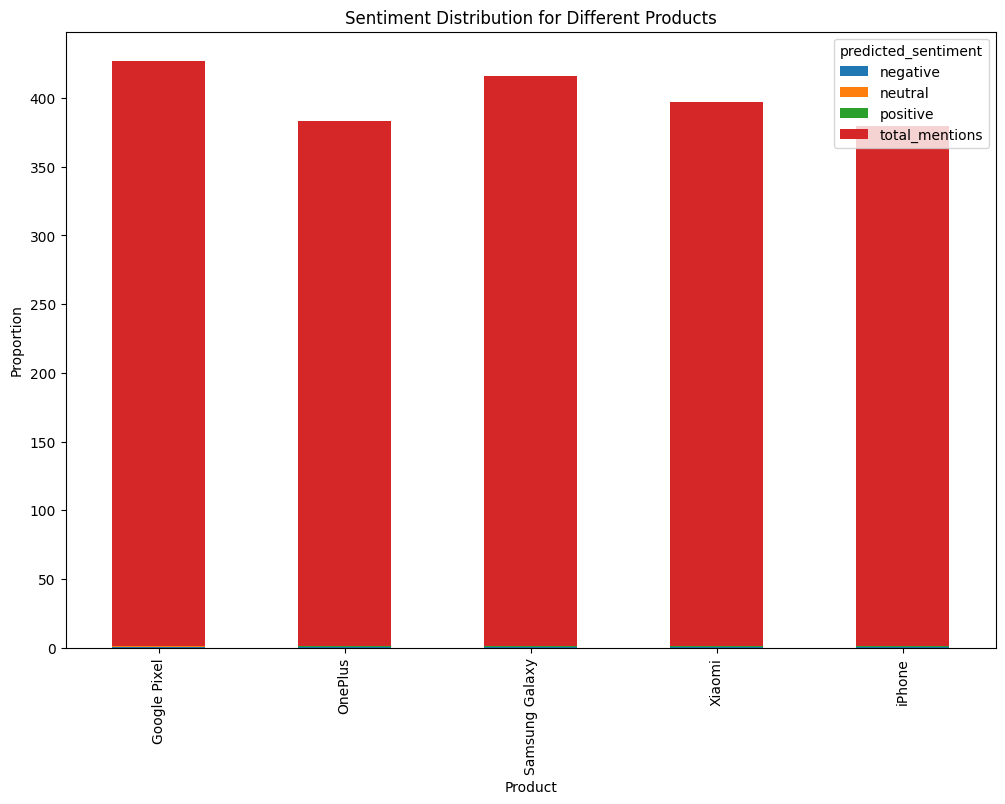

In [96]:
# Predict sentiments for the dataset
data['predicted_sentiment'] = data['content'].apply(lambda x: get_tweet_sentiment(x, vectorizer, selected_model))

# Aggregate sentiment scores for each product
product_sentiment = data.groupby('product')['predicted_sentiment'].value_counts(normalize=True).unstack().fillna(0)
product_sentiment['total_mentions'] = data['product'].value_counts()

# Display the comparison of the most used phones
print(product_sentiment)

# Plot a bar chart for comparison
product_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution for Different Products')
plt.xlabel('Product')
plt.ylabel('Proportion')
plt.show()

In [48]:
# Save the model and vectorizer 
import joblib

joblib.dump(selected_model, "sentiment_model.joblib")
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
